# University of Calgary 
## Final Term Project 
### ENPE 622/533 
#### GROUP 16 
##### AIDAR SULTANOV (30049976), CHIMINH TRAC (10162117), HOANG PHAM (10171919), JOYCE ILUNGA (30119017), MICHAEL SVOBODA (30039040)

In [397]:
# All libraries you need for this project. Run this cell once.
import math
import pandas as pd
import matplotlib.pyplot as plt

Part 1: 

1.1 : Finding Pseudo Critical Temperature and Pressure of Natural Gas. 

1.2 : Finding Gas Compressibility Factor (Bill and Beggs (1978) Correlation)

1.3 : Gas Molecular Weight, density, and Formation Volume Factor

1.4 : Gas Viscosity: Lee at al. (1966) Correlation

1.5 : Solution Gas Oil ratio: Standing (1947) Correlation

1.6 : Bubble Point Pressure

1.7 : Oil isothemal Compressibiilty: Vasquz and Beggs (1977) Correlation

1.8 : Oil formation Volume factor Calculation

1.9 : Oil Density

2.0 : Gas Oil Interfacial Tension

2.1 : Oil Viscosity Model D [Elsharkaway and Alikhan (1999)]

2.2 : Water Properties 

Part 2: 

2.0 : Flow Model B: [Beggs and Brills Method (1973)]

2.1 : Flow Regime Determination

2.2 : Liquid Holdup Determination 

2.3 : Two-Phase Friction Factor

2.4 : Total Pressure Gradient

2.5 : Pressure Drop along the tubing segment

Part 3:

3.0 : Flow Model C: [Gray Method (1978)]

Nonclamenture

Section 1:

  gamma_gas: gas specific gravity
  
  api_oil: oil gravity converted from API
  
  gamma_oil: oil specific gravity 
  
  gamma_wat: water specific gravity
  
  temp_wh: wellhead temp 
  
  temp_wf: bottomhole temp
  
  temp: temperature
  
  pres_wh: well head Pressure in (psia)
  
  pres_wf: bottomhole  Pressure in (psia)
  
  pres: average pressure
  
  CGR: condensate(oil)-gas ratio
  
  CWR: water-gas ratio
  
  GOR: gas-oil ratio
  
  rate_oil_sc: oil rate at standard conditions (STB/day)
  
  rate_gas_sc: gas rate at standard conditions (STB/day)
  
  length: length of the pipe
  
  tube_id: ID in inches
  
  n: n is the number of segments
  
  temp_crit: critical temperature in F
  
  pres_crit: critical pressure in psia
  
  Tpr: pseudo reduced temperature in F 
  
  Ppr: pseudo reduced pressure in 
  
  temp_red: reduced temperature in F
  
  pres_red: reduced pressure in psia
  
  mw_gas: molecular weight of gas
  
  dens_gas: gas density
  
  fvf_gas: gas formation volume factor
  
  visc_gas: gas viscosity
  
  pres_bp: bubble point pressure (psia)
  
  comp_oil: isothermal oil compressibility
    
Section 2:

  ift_og: Gas Oil Interfacial Tension
  
  visc_oil_dead: dead oil viscosity
  
  visc_oil_sat: saturated oil viscosity 
  
  dens_wat: water density
  
  visc_wat: water viscosity
  
  ift_wg: gas-water interfacial tension  
  
  rate_oil: n-situ oil flow rate at the tubing segment
  
  rate_gas: in-situ gas flow rate at the tubing segment
  
  rate_wat: in-situ water flow rate at the tubing segment
  
  frac_wat: water fraction
  
  frac_oil: oil fraction
  
  rate_liq: in-situ liquid flow rate at the tubing segment
  
  holdup_gas: gas holdup
  
  holdup_ns_liq: no slip liquid holdup
  
  holdup_ns_gas: no slip gas holdup
  
  A: tube cross sectional flow area
  
  vel_sfl_liq: superficial liquid velocity
  
  vel_sfl_gas: superficial gas velocity
  
  vel_mix: mixture velocity
  
  vel_actual_liq: actual liquid velocity
  
  vel_actual_gas: actual gas velocity
  
  vel_slip: slip velocity
  
  dens_liq: density of liquid 
  
  dens_ns: no-slip mixture density
  
  desn_holdup: holdup mixture density 
  
  visc_liq: viscosity of liquid 
  
  ift_lg: gas-liquid interfacial tension   
  
  flowType: flow regime    
  
  num_re: reynold's number 
  
  noslip_FF: no slip friction factor 
  
  friction_tp: two phase friction factor 
  
  num_kinetic: kinetic energy 
  
  grad_pres_pe: hydrostatic pressure gradient
  
  grad_pres_fr: friction pressure gradient 
  
  grad_pres_tot: total pressure gradient  
  
  del_length: tubing length per segment 
  
  pres_drop: pressure drop along tubing segment
    
Section 3:
    
num_r: dimensionless number R 

num_d: dimensionless number N_d

num_v: dimensionless number N_v

pseudo_roughness: pseudo-wall-roughness factor 

dens_ns: density for no-slip mixture

In [398]:

#api_oil = (141.5 / gamma_oil) - 131.5
#Input values for in-situ fluid and flow properties
gamma_gas = 0.861             #gas gravity
api_oil = 35              #oil gravity converted from API to 
gamma_oil = 141.5 / (api_oil + 131.5) # gamma oil rearrangement from api oil
gamma_wat = 0
temp_wh = 153             # wellhead temp in F (deg R) = (deg F + 459.69)
temp_wf = 283             # bottomhole temp in F
temp = 1
pres_wh = 400             # well head Pressure in (psia)
pres_wf = 3015.709        # bottomhole  Pressure in (psia)
pres = 1                  #average pressure
CGR = 0                   #condensate(oil)-gas ratio
CWR = 0                   #water-gas ratio
GOR = 1500                #gas-oil ratio
rate_oil_sc = 1000        #oil rate at standard conditions (STB/day)
rate_gas_sc =  GOR*rate_oil_sc        #oil rate at standard conditions (STB/day)

roughness = 0.001
length = 10000                 #length of the pipe
tube_id = 1.65              # ID in inches
n = 50                      #n is the number of segments


#Definition of in-situ flow properties
#rate_oil_sc = CGR*rate_gas_sc                                       #oil rate at standard conditions (STB/day)
#rate_wat_sc = CWR*rate_gas_sc                                       #water rate at standard conditions (STB/day)
#rate_gas_sc =  GOR*rate_oil_sc                                      #gas rate at standard conditions (SCF/day)

1.1 : Finding Pseudo Critical Temperature and Pressure of Natural Gas.

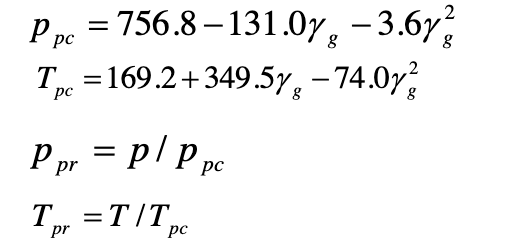

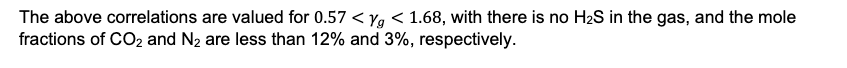

In [399]:
# -------------------------------------------------------------------------------------------------------------
# 1.1 : Finding Pseudo Critical Temperature and Pressure of Natural Gas. 
# -------------------------------------------------------------------------------------------------------------

def calculate_Psuedo_Critical_T_P (gamma_gas) :
    temp_crit = 0 # initialzing the variables
    pres_crit = 0
    if 0.57 < gamma_gas < 1.68:
        temp_crit = 169.2 + 349.5 * gamma_gas - 74.0 * (gamma_gas**2)
        pres_crit = 756.8 - 131.0 * gamma_gas - 3.6 * (gamma_gas**2)
    else :
        print("Gamma_gas is out of Range (0.57 < gamma_gas < 1.68). Value of = " + str(gamma_gas))
    return temp_crit, pres_crit

1.2 :Finding Gas Compressibility Factor (Bill and Beggs (1978) Correlation)

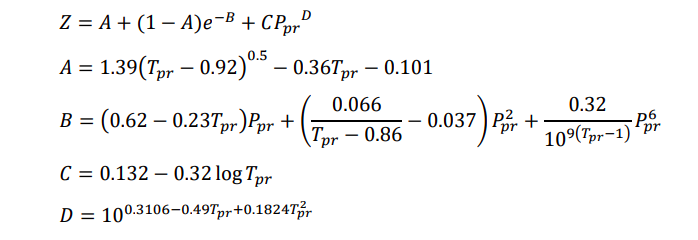

In [400]:
# -------------------------------------------------------------------------------------------------------------
# 1.2 :Finding Gas Compressibility Factor (Bill and Beggs (1978) Correlation)
# -------------------------------------------------------------------------------------------------------------

# Returns a psuedo reduced temperature and pressure in a tuple
def calculate_Psuedo_Reduced_T_P (gamma_gas) :

    Tpc_Ppc = calculate_Psuedo_Critical_T_P(gamma_gas) # this is a tuple with both psuedo critical values

    temp_red = (temp+459.69)/Tpc_Ppc[0]
    pres_red = pres/Tpc_Ppc[1]

    return temp_red, pres_red

def calculate_Z_factor (gamma_gas):
                                                  
    # Finding Tpr and Ppr
    Tpr = calculate_Psuedo_Reduced_T_P(gamma_gas)[0] 
    Ppr = calculate_Psuedo_Reduced_T_P(gamma_gas)[1]
                                                  
    # Calculating Z factor parameters
    A = 1.39 * (Tpr - 0.92) ** 0.5 - 0.36 * Tpr - 0.101
    B = Ppr * (0.62 - 0.23 * Tpr) + (0.066 / (Tpr - 0.86) - 0.037) * (Ppr ** 2) + 0.32 * Ppr ** 6 / (10 ** (9 * (Tpr - 1)))
    C = 0.132 - (0.32 * (math.log10(Tpr)))
    D = 10 ** (0.3106 - 0.49 * Tpr + 0.1824 * (Tpr ** 2))
    z_factor = A + (1 - A) * math.exp(-B) + C * Ppr ** D
    
    return z_factor

1.3 : Gas Molecular Weight, density, and Formation Volume Factor

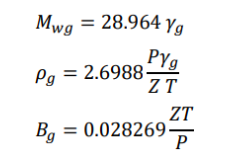

In [401]:
# -------------------------------------------------------------------------------------------------------------
# 1.3 : Gas Molecular Weight, density, and Formation Volume Factor
# -------------------------------------------------------------------------------------------------------------

mw_gas = 28.964*gamma_gas                                                       #gas molecular weight 

def calc_dens_gas(pres, gamma_gas, temp) :
    dens_gas = (2.6988 * pres * gamma_gas) / (calculate_Z_factor(gamma_gas) * temp) #gas density
    return dens_gas

def calc_fvf_gas (temp, pres) :
    fvf_gas = 0.028269* (calculate_Z_factor(gamma_gas)* temp) / pres                #gas formation volume factor
    return fvf_gas

1.4 : Gas Viscosity: Lee at al. (1966) Correlation

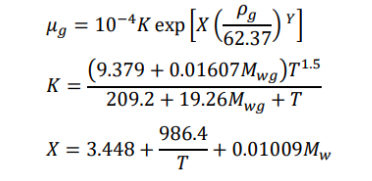

In [402]:
# -------------------------------------------------------------------------------------------------------------
# 1.4 : Gas Viscosity: Lee at al. (1966) Correlation
# -------------------------------------------------------------------------------------------------------------
def calc_visc_gas (temp, mw_gas, dens_gas) :

    X = 3.448 + (986.4 / temp) + 0.01009 * mw_gas
    Y = 2.447 - 0.2224 * X
    K = ((9.379 + 0.01607*mw_gas) * (temp ** 1.5) ) / (209.2 + 19.26 * mw_gas + temp)

    visc_gas = (10**(-4)) * K * math.exp(X * (dens_gas / 62.37)**Y)                 #gas viscosity

    return visc_gas

1.5 : Solution Gas Oil ratio: Standing (1947) Correlation

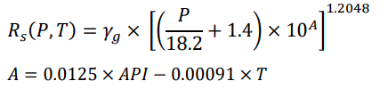

In [403]:
# -------------------------------------------------------------------------------------------------------------
# 1.5 : Solution Gas Oil ratio: Standing (1947) Correlation
# -------------------------------------------------------------------------------------------------------------

def calc_Rs(api_oil, temp, pres) :
    #api_oil = (141.5 / gamma_oil) - 131.5                        #oil api gravity
    A = 0.0125*api_oil - 0.00091*temp
    Rs = gamma_gas * (((pres / 18.2) + 1.4)*(10**A))**1.2048      #dissolved gas (SCF/STB)

    return Rs

1.6 : Bubble Point Pressure

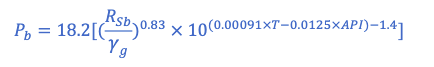

In [404]:
# -------------------------------------------------------------------------------------------------------------
# 1.6 : Bubble Point Pressure
# -------------------------------------------------------------------------------------------------------------

# this is calculating the bubble point pressure from the solution gas oil ratio
def calc_pres_bp(GOR, gamma_gas, temp, api_oil) :
    
    Rsb = GOR
    pres_bp = 18.2*(((Rsb/gamma_gas)**0.83) * 10**((0.00091*temp - 0.0125*api_oil) - 1.4))  #bubble point pressure (psia)

    return pres_bp

1.7 : Oil isothemal Compressibilty: Vasquz and Beggs (1977) Correlation

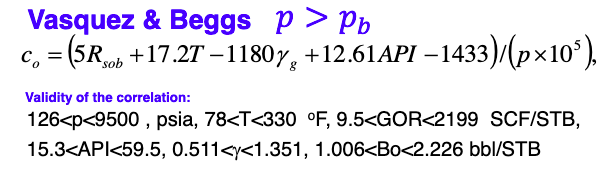

In [405]:
# -------------------------------------------------------------------------------------------------------------
# 1.7 : Oil isothemal Compressibilty: Vasquz and Beggs (1977) Correlation
# -------------------------------------------------------------------------------------------------------------
def calc_oil_isothermal_comp(Rs, temp, gamma_gas, api_oil, pres):
    comp_oil = (5*Rs + 17.2*temp - 1180*gamma_gas + 12.61*api_oil - 1433) / (pres*(10**5))
    return comp_oil

1.8 : Oil formation Volume factor Calculation

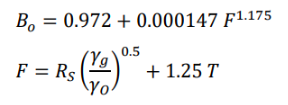

In [406]:
# -------------------------------------------------------------------------------------------------------------
# 1.8 : Oil formation Volume factor Calculation
# -------------------------------------------------------------------------------------------------------------
def calc_fvf_oil(Rs, gamma_gas, gamma_oil, temp, pres, pres_bp):

    fvf_oil = 0

    # calcu
    if pres < pres_bp :
        F = Rs*((gamma_gas / gamma_oil)**0.5) + 1.25*temp
        fvf_oil = 0.972 + 0.000147*(F**(1.175))
    elif pres >= pres_bp :
        F = Rs*((gamma_gas / gamma_oil)**0.5) + 1.25*temp
        fvf_oil_bp = 0.972 + 0.000147*(F**(1.175))
        fvf_oil = fvf_oil_bp*math.exp(calc_oil_isothermal_comp(Rs, temp, gamma_gas, api_oil, pres)*(pres_bp-pres))

    return fvf_oil

1.9 : Oil Density

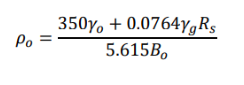

In [407]:
# -------------------------------------------------------------------------------------------------------------
# 1.9 : Oil Density
# -------------------------------------------------------------------------------------------------------------
def calc_dens_oil (pres_bp, gamma_oil, gamma_gas, Rs, fvf_oil, pres) :
    
    dens_oil = 0
    if pres < pres_bp :
        dens_oil = (350*gamma_oil + 0.0764*gamma_gas*Rs) / (5.615*fvf_oil)
    elif pres >= pres_bp :
        dens_oil_bp = (350*gamma_oil + 0.0764*gamma_gas*Rs) / (5.615*fvf_oil)
        dens_oil = dens_oil_bp*math.exp(calc_oil_isothermal_comp(Rs, temp, gamma_gas, api_oil, pres)*(pres-pres_bp))

    return dens_oil

2.0 : Gas Oil Interfacial Tension

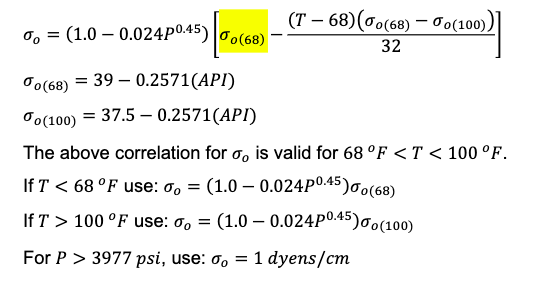

In [408]:
# -------------------------------------------------------------------------------------------------------------
# 2.0 : Gas Oil Interfacial Tension
# -------------------------------------------------------------------------------------------------------------

def calculate_Interfacial_Tension_Gas_Oil(temp,pres,api_oil) :

    ift_og = 0
    ift_og_100 = 37.5 - 0.2571 * api_oil
    ift_og_68 = 39 - 0.2571 * api_oil

    if pres > 3977 : 
        ift_og = 1 # dynes / cm
    
    elif temp < 68 :
        ift_og = (1-0.024*pres**(0.45))*ift_og_68
    
    elif temp > 100 :
        ift_og = (1-0.024*pres**(0.45))*ift_og_100
    
    else :
        ift_og = (1-0.024*pres**(0.45))*(ift_og_68 - ((temp-68)*(ift_og_68 - ift_og_100))/32)
    
    return ift_og

2.1 : Oil Viscosity Model D [Elsharkaway and Alikhan (1999)]

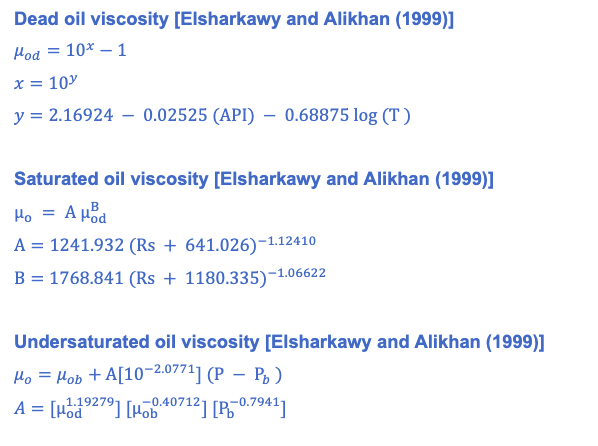

In [409]:
# -------------------------------------------------------------------------------------------------------------
# 2.1 : Oil Viscosity Model D [Elsharkaway and Alikhan (1999)]
# -------------------------------------------------------------------------------------------------------------

# method for calculating the dead oil viscosity
def dead_oil (api_oil,temp) :
    
    Y = 2.16924 - 0.02525*(api_oil) - 0.68875*math.log10(temp)
    X = 10**Y
    visc_oil_dead = 10**X - 1
    
    return visc_oil_dead

# method for calculating the saturated oil viscosity
def saturated_oil (Rs, visc_oil_dead) :
    
    B = 1768.841*(Rs + 1180.335)**(-1.06622)
    A = 1241.932*(Rs + 641.026)**(-1.12410)
    visc_oil_sat = A * dead_oil(api_oil,temp)**B
    
    return visc_oil_sat

# method for calculating the undersaturated oil viscosity
def undersaturated_oil (pres, pres_bp, visc_oil_bp, visc_oil_dead) :

    A = (visc_oil_dead**1.19279)*(visc_oil_dead**(-0.40712))*(pres_bp**(-0.7941))
    visc_oil_undersaturated = visc_oil_bp + A*(10**(-2.0771)) *(pres - pres_bp)

    return visc_oil_undersaturated

# function for determining the correct oil viscosity based on the pressure
def calc_visc_oil (Rs, api_oil, temp, pres, pres_bp) :

    visc_oil_dead = dead_oil (api_oil,temp)

    if pres <= pres_bp :
        visc_oil = saturated_oil(Rs, dead_oil(api_oil, temp))
    elif pres > pres_bp :
        visc_oil_bp = saturated_oil(Rs, dead_oil(api_oil, temp))
        visc_oil = undersaturated_oil(pres, pres_bp, visc_oil_bp, dead_oil(api_oil, temp))
        
    return visc_oil

#2.1 main function



2.2 : Water Properties

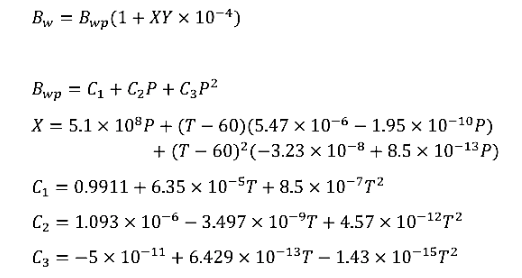


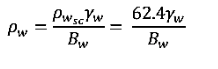

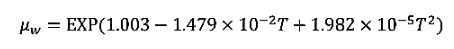

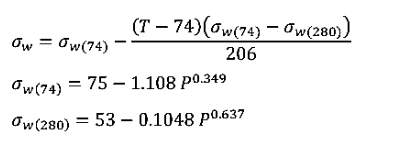

In [410]:
# -------------------------------------------------------------------------------------------------------------
# 2.2 : Water Properties 
# -------------------------------------------------------------------------------------------------------------

# Water Formation Volume Factor Calculation
def calc_fvf_wat (temp, pres, Y) :                 # note Y is the salinity of the Water in ppm
    X = 5.1*(10**8)*pres + (temp - 60)*(5.47*(10*(-6)) - 1.95*(10*(-10))*pres) + ((temp - 60)**2)*(-3.23*(10*(-8)) + 8.5*(10*(-13))*pres)
    C_1 = 0.9911 + 6.35*(10**(-5))*temp + 8.5*(10**(-7))*temp**2
    C_2 = 1.093*(10**(-6)) - 3.497 * (10**(-9)) * temp + 4.57 * (10**(-12)) * temp**(2)
    C_3 = -5*(10**(-11)) + 6.429 * (10**(-13)) * temp - 1.43 * (10**(-15)) * temp**(2)
    fvf_wat_pure = C_1 + C_2 * pres + C_3*(pres**2)
    fvf_wat = fvf_wat_pure * (1 + X*Y * (10**(-4)))
    
    return fvf_wat

# Water Density
def calc_dens_wat (gamma_wat, fvf_wat) :
    dens_wat = ((62.4*gamma_wat)/fvf_wat)
    return dens_wat

# Water Viscosity
def calc_visc_wat (temp) :
    visc_wat = math.exp(1.003-1.479*(10**(-2)) * temp + 1.982*(10**(-5))*temp**(2))
    return visc_wat

# Gas-Water Interfacial Tension
def calculate_Gas_Water_Interfacial_Tension (temp,pres) :

    ift_wg = 0
    ift_wg_280 = 53 - 0.1048 * (pres**0.637)
    ift_wg_74 = 75 - 1.108 * (pres**0.349)

    if temp < 74 :
        ift_wg = ift_wg_74
    
    elif temp > 280 :
        ift_wg = ift_wg_280
    
    else :
        ift_wg = (ift_wg_74 - ((temp-74)*(ift_wg_74 - ift_wg_280))/206)
    
    return ift_wg

2.3 : Flow Model B: Beggs and Brills Method

In [411]:
# -------------------------------------------------------------------------------------------------------------
# 2.3 : Flow Model B: Beggs and Brills Method
# -------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------
# 2.4 : Determine the Flow Regime
# -------------------------------------------------------------------------------------------------------------


def determine_Flow (holdup_ns_liq, num_lone, num_ltwo, num_lthree, num_lfour, num_fr) :

    flowType = ""

    # segregated flow conditions
    if (holdup_ns_liq < 0.01 and num_fr < num_lone) or (holdup_ns_liq > 0.01 and num_fr < num_ltwo) :
        flowType = "segregated"

    # transition flow conditions
    elif holdup_ns_liq >= 0.01 and num_ltwo < num_fr <= num_lthree :
        flowType = "transition"

    # distributed flow conditions
    elif (holdup_ns_liq < 0.4 and num_fr >= num_lone) or (holdup_ns_liq >= 0.4 and num_fr > num_lfour) :
        flowType = "distributed"

    # intermittent flow
    elif (0.4 > holdup_ns_liq >= 0.01 and num_lthree < num_fr <= num_lone) or (holdup_ns_liq >= 0.4 and num_lthree < num_fr <= num_lfour) :
        flowType = "intermittent"

    return flowType

def identify_Flow_Parameters (flowType) :

    parameters = []

    if flowType == "segregated" :
        segregated_Parameters = [0.98, 0.4846, 0.0868]
        parameters.extend(segregated_Parameters)

    elif flowType == "distributed" :
        distributed_Parameters = [1.065, 0.5824, 0.0609]
        parameters.extend(distributed_Parameters)

    elif flowType == "intermittent" :
        intermittent_Parameters = [0.845, 0.5351, 0.0173]
        parameters.extend(intermittent_Parameters)

    elif flowType == "transition" :
        segregated_Parameters = [0.98, 0.4846, 0.0868]
        intermittent_Parameters = [0.845, 0.5351, 0.0173]

        parameters.extend(segregated_Parameters + intermittent_Parameters)
    
    return parameters

#flow_parameter_array = identify_Flow_Parameters()

2.5 : Liquid Holdup Determination

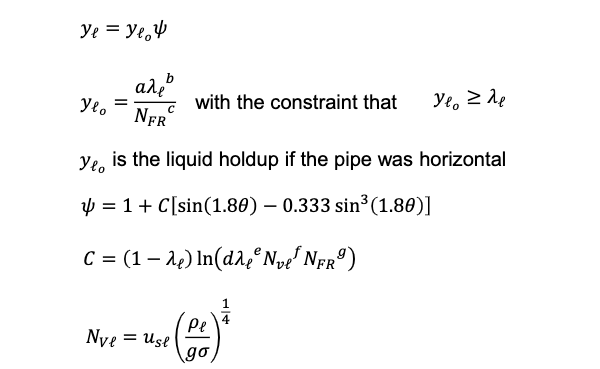

In [412]:
# -------------------------------------------------------------------------------------------------------------
# 2.5 : Liquid Holdup Determination 
# -------------------------------------------------------------------------------------------------------------
def liquid_holdup_calculation(flow_parameter_array, num_fr) :
    
    holdup_liq = 0

    if len(flow_parameter_array) == 3 :

        a = flow_parameter_array[0]
        b = flow_parameter_array[1]
        c = flow_parameter_array[2]
        holdup_liq = (a*(holdup_ns_liq**b)) / (num_fr**c)
    
    elif len(flow_parameter_array) == 6 :

        seg_a = flow_parameter_array[0]
        seg_b = flow_parameter_array[1]
        seg_c = flow_parameter_array[2]

        inter_a = flow_parameter_array[3]
        inter_b = flow_parameter_array[4]
        inter_c = flow_parameter_array[5]

        seg_holdup_liq = (seg_a*(holdup_ns_liq**seg_b)) / (num_fr**seg_c)
        inter_holdup_liq = (inter_a*(holdup_ns_liq**inter_b)) / (num_fr**inter_c)

        A = (num_lthree-num_fr)/ (num_lthree - num_ltwo)

        holdup_liq = A*seg_holdup_liq + (1-A)*inter_holdup_liq

    return holdup_liq

2.6 : Two-Phase Friction Factor

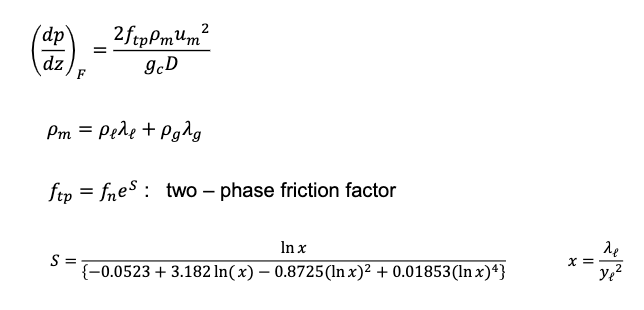

In [413]:
# -------------------------------------------------------------------------------------------------------------
# 2.6 : Two-Phase Friction Factor
# -------------------------------------------------------------------------------------------------------------
def calculate_two_phase_Friction_Factor (dens_ns, vel_mix, tube_id, visc_liq, visc_gas, holdup_ns_liq, holdup_ns_gas, roughness, holdup_liq) :

    # finding reynolds number
    num_re = 1488*((dens_ns*vel_mix*tube_id)/(visc_liq * holdup_ns_liq + visc_gas * holdup_ns_gas))

    # other correlations
    inv_sqrt_noslip_FF = 1.14 - 2* math.log10( (roughness/tube_id) + (21.25/ (num_re**0.9) ) )

    noslip_FF = (1 / inv_sqrt_noslip_FF)**2.0

    x = holdup_ns_liq / holdup_liq**2.0

    w = math.log(x)

    S = 0

    # cases for determining the parameter
    if 1 < x < 1.2 :
        S = math.log(2.2*x-1.2)
    else :
        S = w / (-0.0523  + 3.182*w - 0.8725*(w**2) + 0.01853*(w**4))

    friction_tp = noslip_FF* math.e**(S)

    return friction_tp

2.7 : Total Pressure Gradient

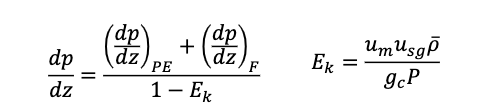

In [414]:
# -------------------------------------------------------------------------------------------------------------
# 2.7 : Total Pressure Gradient
# -------------------------------------------------------------------------------------------------------------
def tot_Pressure_Gradient(vel_mix, vel_sfl_gas, dens_ns, pres_avg, desn_holdup, tube_id) :

    num_kinetic = (vel_mix * vel_sfl_gas * dens_ns) / (32.17 * pres_avg)

    grad_pres_pe = (1/144)*(dens_holdup*math.sin(90))
    #print("density holdup = " + str(dens_holdup))

    grad_pres_fr = (1/144)*((2*friction_tp*dens_ns*vel_mix**2) / (32.17*tube_id))

    grad_pres_tot = (grad_pres_pe + grad_pres_fr) / (1 - num_kinetic)

    return grad_pres_tot

2.8 : Pressure Drop along the tubing segment

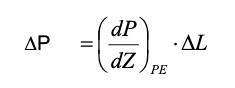

In [415]:
# -------------------------------------------------------------------------------------------------------------
# 2.8 : Pressure Drop along the tubing segment 
# -------------------------------------------------------------------------------------------------------------
def segment_Pressure_Drop (length, n, grad_pres_tot) :

    del_length = length / n

    pres_drop = grad_pres_tot * del_length

    return pres_drop

In [416]:
# -------------------------------------------------------------------------------------------------------------
# 3.0 : Flow Model C: Gray Method
# -------------------------------------------------------------------------------------------------------------

#Calculation of the Liquid Holdup using Dimensionless Numbers
def calculate_holdup_liquid(vel_sfl_liq,vel_sfl_gas,dens_liq,dens_gas,tube_id,ift_lg,dens_ns,vel_mix):
    num_r = vel_sfl_liq / vel_sfl_gas
    B = 0.0814 * (1-0.0554*math.log(1+(730*num_r)/(num_r+1)))
    num_d = 453.5929 * (32.17*(dens_liq - dens_gas)*tube_id**(2))/ift_lg
    num_v = 453.5929 *(((dens_ns**2)*(vel_mix**4))/(32.17*(dens_liq - dens_gas)*ift_lg))
    holdup_liq = 1-(1-math.exp(-2.314*(num_v*(1+205/num_d)**B)))/(num_r+1)
    return holdup_liq

#Friction Factor Determination
def calculate_friction_factor(roughness, ift_lg, dens_ns, vel_mix, num_r, tube_id):
    if num_r >= 0.007:
    # Pseudo-wall-roughness factor:
    #dens_ns = (1- holdup_ns_liq)*dens_gas + holdup_ns_liq * dens_liq
        pseudo_roughness = (2.20462 * 10**(-3))*((28.5*ift_lg)/(dens_ns * (vel_mix**2)))
    
    elif num_r < 0.007:
        #roughness = 0.000078                           #roughness of the pipe
        pseudo_roughness = roughness + (num_r/0.0007)*((2.20462*10**(-3))*((28.5*ift_lg)/(dens_ns * (vel_mix**2))) - roughness)

    friction = (1/(1.74 - 2*math.log(2*(pseudo_roughness / tube_id)))**2) 
    friction_tp = friction / 4                         #friction factor
    return friction_tp

In [417]:
# The Total Pressure Gradient
def calculate_pressure_gradient(dens_ns,friction_tp,vel_mix,tube_id, pres_avg):

    num_kinetic = (vel_mix * vel_sfl_gas * dens_ns) / (32.17 * pres_avg)
    
    grad_pres_pe = (1/144) * dens_ns * (32.17/32.17) * math.sin(90)
    grad_pres_fr = (1/144) * ((2*friction_tp * dens_ns * (vel_mix**2))/(32.17*tube_id))
    grad_pres_tot = (grad_pres_pe + grad_pres_fr ) / (1 - num_kinetic)       #hydrostatic pressure gradient + friction pressure gradient
    
    return grad_pres_tot



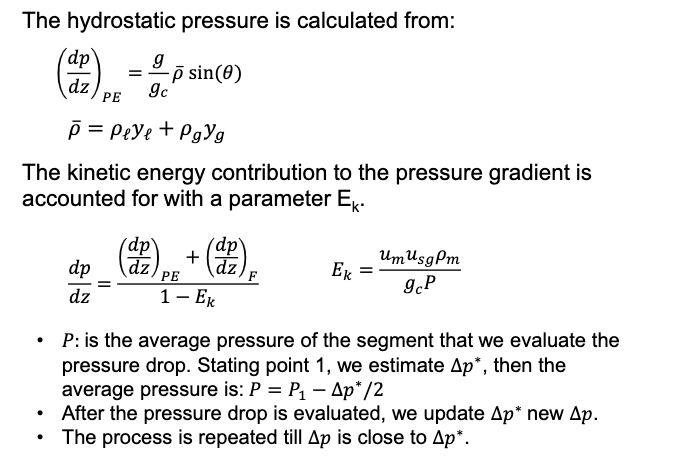

Tave384.135
Pave400.0
estimate density : 19.01358986578196
estimate : 26.40776370247494
New: 33.34 Old: 10
New: 33.32 Old: 33.34
New: 33.32 Old: 33.32
New: 33.32 Old: 33.32
-------------- NEW SECTION --------------- 
 
estimate density : 19.311498274398552
estimate : 26.8215253811091
New: 33.22 Old: 33.32
New: 33.22 Old: 33.22
New: 33.22 Old: 33.22
-------------- NEW SECTION --------------- 
 
estimate density : 19.18699332678942
estimate : 26.64860184276308
New: 33.12 Old: 33.22
New: 33.12 Old: 33.12
New: 33.12 Old: 33.12
New: 33.12 Old: 33.12
-------------- NEW SECTION --------------- 
 
estimate density : 19.064033970152227
estimate : 26.47782495854476
New: 33.03 Old: 33.12
New: 33.03 Old: 33.03
New: 33.03 Old: 33.03
New: 33.03 Old: 33.03
-------------- NEW SECTION --------------- 
 
estimate density : 18.94259264483438
estimate : 26.30915645115886
New: 32.93 Old: 33.03
New: 32.93 Old: 32.93
New: 32.93 Old: 32.93
New: 32.93 Old: 32.93
-------------- NEW SECTION --------------- 
 
es

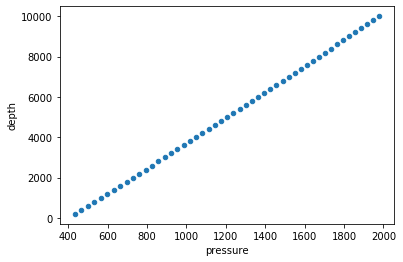

In [418]:
x_depth = list()
y_pres = list()


# global variables
# Input values for in-situ fluid and flow properties
gamma_gas = 0.861             #gas gravity
api_oil = 35              #oil gravity converted from API to 
gamma_oil = 141.5 / (api_oil + 131.5) # gamma oil rearrangement from api oil
gamma_wat = 0
temp_wh = 153             # wellhead temp in F (deg R) = (deg F + 459.69)
temp_wf = 283             # bottomhole temp in F
pres_wh = 400             # well head Pressure in (psia)
pres_wf = 3015.709        # bottomhole  Pressure in (psia)
CGR = 0                   #condensate(oil)-gas ratio
CWR = 0                   #water-gas ratio
GOR = 1500                #gas-oil ratio
rate_oil_sc = 1000        #oil rate at standard conditions (STB/day)
rate_gas_sc =  GOR*rate_oil_sc        #oil rate at standard conditions (STB/day)

roughness = 0.001
length = 10000            #length of the pipe
tube_id = 1.65            #ID in inches
n = 50                    #n is the number of segments
dL = length/n             #ft, length of each segment

depth_value = 0
temp1 = temp_wh
pres1 = pres_wh
grad_temp = (temp_wf - temp_wh)/length #degree in F, linear temperature gradient 

# initial iteration value calculations
T1 = temp1
T2 = grad_temp*dL + T1
P1 = pres1
P2 = pres1

Pave = (P1 + P2) / 2
Tave = ((T2 + T1) + 459.67) / 2
TOTAL_PRESSURE = pres_wh

print("Tave" + str(Tave))
print("Pave" + str(Pave))

pres_drop_new = 10
pres_drop_old = pres_drop_new + 1

num_lengths = 0

# starting with p1 at position L1
# selecting a length increment L

# pressure drop estimate
pres_drop = 1

flow_model = "C"

for i in range(1, n+1, 1):

    pres_drop = pres_drop_new
    counter = 1
    num_lengths = num_lengths + 1
    temp_drop = num_lengths*dL*grad_temp

# estimating the pressure drop delta p 
#       start with no slip average density [CONSTANT] flow rate dependant
#       potential energy gradient
#       calc temperature drop

# calculate fluid properites in order to get estimate for pressure
    pres_drop_old = pres_drop_new

    pres = P1 + pres_drop/2
    temp = T1 + temp_drop/2

    Rs = calc_Rs(api_oil, temp, pres)
    pres_bp = calc_pres_bp(GOR, gamma_gas, temp, api_oil) 
    fvf_oil = calc_fvf_oil(Rs, gamma_gas, gamma_oil, temp, pres, pres_bp)
    fvf_gas = calc_fvf_gas(temp, pres)
    fvf_wat = calc_fvf_wat(temp, pres, 1)
    dens_gas = calc_dens_gas(pres, gamma_gas, temp)
    dens_oil = calc_dens_oil(pres_bp, gamma_oil, gamma_gas, Rs, fvf_oil, pres)
    dens_wat = calc_dens_wat(gamma_wat, fvf_wat)
    visc_oil = calc_visc_oil(Rs, api_oil, temp, pres, pres_bp)
    visc_wat = calc_visc_wat(temp)
    visc_gas = calc_visc_gas (temp, mw_gas, dens_gas)
    ift_og = calculate_Interfacial_Tension_Gas_Oil(temp,pres,api_oil)
    ift_wg = calculate_Gas_Water_Interfacial_Tension (temp,pres)

    rate_oil = rate_oil_sc*fvf_oil*(5.6145/86400)                       #in-situ oil flow rate at the tubing segment
    rate_gas = (rate_gas_sc)*fvf_gas/86400                              #in-situ gas flow rate at the tubing segment
    
    rate_wat = 0 #rate_wat_sc*fvf_wat*(5.6145/86400)           #in-situ water flow rate at the tubing segment
    frac_wat = 0 #rate_wat / rate_oil                                   #water fraction
    frac_oil = 1 - frac_wat                                             #oil fraction
    rate_liq = rate_oil + rate_wat                                      #in-situ liquid flow rate at the tubing segment

    holdup_ns_liq = rate_liq / (rate_liq + rate_gas)                    #no slip liquid holdup
    holdup_ns_gas = 1 - holdup_ns_liq                                   #no slip gas holdup
    A = math.pi * ((tube_id / 2)**2) / 144                              #tube cross sectional flow area
    vel_sfl_liq = rate_liq / A                                          #superficial liquid velocity
    vel_sfl_gas = rate_gas / A                                          #superficial gas velocity
    vel_mix = vel_sfl_liq + vel_sfl_gas                                 #mixture velocity
    vel_actual_liq = vel_sfl_liq / holdup_ns_liq                        #actual liquid velocity
    vel_actual_gas = vel_sfl_gas / holdup_ns_gas                        #actual gas velocity
    vel_slip = vel_actual_gas - vel_actual_liq                          #slip velocity

    #Definition of in-situ fluid properties
    dens_liq = dens_oil*frac_oil + dens_wat*frac_wat                    #density of liquid 
    dens_ns = (1 - holdup_ns_liq)*dens_gas + holdup_ns_liq*dens_liq     #no-slip mixture density

    estimate_pres_grad = (1 / 144) * dens_ns
    estimate_pres_drop = estimate_pres_grad*dL
    pres_drop_new = estimate_pres_drop
    print("estimate density : " + str(dens_ns))

    print("estimate : " + str(estimate_pres_drop))
    
    while(abs(pres_drop_new - pres_drop_old) > 0.00000001) :

        # calculate fluid properites at average pressure
        # calculate the pressure gradient with a two phase flow correlation
        # find new delta p
        # iterate if delta p new =/= delta p old

        pres_drop_old = pres_drop

        pres = P1 + pres_drop/2
        temp = T1 + temp_drop/2

        Rs = calc_Rs(api_oil, temp, pres)
        pres_bp = calc_pres_bp(GOR, gamma_gas, temp, api_oil) 
        fvf_oil = calc_fvf_oil(Rs, gamma_gas, gamma_oil, temp, pres, pres_bp)
        fvf_gas = calc_fvf_gas(temp, pres)
        fvf_wat = calc_fvf_wat(temp, pres, 1)
        #holdup_liq = 0.1 
        dens_gas = calc_dens_gas(pres, gamma_gas, temp)
        dens_oil = calc_dens_oil(pres_bp, gamma_oil, gamma_gas, Rs, fvf_oil, pres)
        dens_wat = calc_dens_wat(gamma_wat, fvf_wat)
        visc_oil = calc_visc_oil(Rs, api_oil, temp, pres, pres_bp)
        visc_wat = calc_visc_wat(temp)
        visc_gas = calc_visc_gas (temp, mw_gas, dens_gas)
        ift_og = calculate_Interfacial_Tension_Gas_Oil(temp,pres,api_oil)
        ift_wg = calculate_Gas_Water_Interfacial_Tension (temp,pres)

        rate_oil = rate_oil_sc*fvf_oil*(5.6145/86400)                       #in-situ oil flow rate at the tubing segment
        rate_gas = (rate_gas_sc)*fvf_gas/86400   #in-situ gas flow rate at the tubing segment
        #print(rate_gas_sc, rate_oil_sc,GOR)
        rate_wat = 0 #rate_wat_sc*fvf_wat*(5.6145/86400)           #in-situ water flow rate at the tubing segment
        frac_wat = 0 #rate_wat / rate_oil                                      #water fraction
        frac_oil = 1 - frac_wat                                             #oil fraction
        rate_liq = rate_oil + rate_wat                                      #in-situ liquid flow rate at the tubing segment
                                                 #gas holdup
        holdup_ns_liq = rate_liq / (rate_liq + rate_gas)                    #no slip liquid holdup
        holdup_ns_gas = 1 - holdup_ns_liq                                   #no slip gas holdup
        A = math.pi * ((tube_id / 2)**2) / 144                              #tube cross sectional flow area
        vel_sfl_liq = rate_liq / A                                          #superficial liquid velocity
        vel_sfl_gas = rate_gas / A                                          #superficial gas velocity
        vel_mix = vel_sfl_liq + vel_sfl_gas                                 #mixture velocity
        vel_actual_liq = vel_sfl_liq / holdup_ns_liq                        #actual liquid velocity
        vel_actual_gas = vel_sfl_gas / holdup_ns_gas                        #actual gas velocity
        vel_slip = vel_actual_gas - vel_actual_liq                          #slip velocity
        num_r = vel_sfl_liq / vel_sfl_gas

        #Definition of in-situ fluid properties
        dens_liq = dens_oil*frac_oil + dens_wat*frac_wat                            #density of liquid 
        dens_ns = (1 - holdup_ns_liq)*dens_gas + holdup_ns_liq*dens_liq     #no-slip mixture density
        visc_liq = visc_oil*frac_oil + visc_wat*frac_wat                            #viscosity of liquid 
        ift_lg = (frac_oil*ift_og + 0.617*frac_wat*ift_wg)/(frac_oil+(0.617*frac_wat)) # gas-liquid interfacial tension for Grey Method
        ift_lg = frac_oil*ift_og + frac_wat*ift_wg                                     # gas-liquid interfacial tension
        
        # determining flow models

        if(flow_model == "B"):

            # FLOW MODEL B - initial variable calculations based off of fluid properties
            num_lone = 316 * (holdup_ns_liq**0.302)
            num_ltwo = 0.000925 * (holdup_ns_liq**(-2.4684))
            num_lthree = 0.10 * (holdup_ns_liq**(-1.4516))
            num_lfour = 0.5 * (holdup_ns_liq**(-6.738))
            num_fr = ((vel_mix**2)/(32.1*tube_id))

            # FLOW MODEL B - function evaluations
            flow_type = determine_Flow(holdup_ns_liq, num_lone, num_ltwo, num_lthree, num_lfour, num_fr)
            flow_parameter_array = identify_Flow_Parameters(flow_type)
            holdup_liq = liquid_holdup_calculation(flow_parameter_array, num_fr)
            holdup_gas = 1 - holdup_liq                                         #gas holdup
            dens_holdup = (1 - holdup_liq)*dens_gas + holdup_liq*dens_liq       #holdup mixture density 
            friction_tp = calculate_two_phase_Friction_Factor(dens_ns, vel_mix, tube_id, visc_liq, visc_gas, holdup_ns_liq, holdup_ns_gas, roughness, holdup_liq)
            grad_pres_tot = tot_Pressure_Gradient(vel_mix, vel_sfl_gas, dens_ns, pres, dens_holdup, tube_id)
            pres_drop = segment_Pressure_Drop(length, n, grad_pres_tot)

            pres_drop_new = pres_drop

            #print("pres_drop = " + str(pres_drop))
            #print(length, n, grad_pres_tot)
            print("New: " + str(round(pres_drop_new, 2)), "Old: " + str(round(pres_drop_old, 2)))
            
            #print(" ")
            #print("ITERATION # : " + str(counter))
            #print(" ")

        elif(flow_model == "C"):

            holdup_liq = calculate_holdup_liquid(vel_sfl_liq, vel_sfl_gas, dens_liq, dens_gas, tube_id, ift_lg, dens_ns, vel_mix)
            friction_tp = calculate_friction_factor(roughness, ift_lg, dens_ns, vel_mix, num_r, tube_id)
            grad_pres_tot = calculate_pressure_gradient(dens_ns, friction_tp, vel_mix, tube_id, pres)


            # The Pressure Drop in the Tubing Segment
            del_length = length / n                            #n is the number of segments, del_length is the tubing segment length
            pres_drop = grad_pres_tot * del_length              #Pressure drop along the tubing segment

            pres_drop_new = pres_drop

            #print("pres_drop = " + str(pres_drop))
            #print(length, n, grad_pres_tot)
            print("New: " + str(round(pres_drop_new, 2)), "Old: " + str(round(pres_drop_old, 2)))
            
            #print(" ")
            #print("ITERATION # : " + str(counter))
            #print(" ")

        counter = counter + 1

    print("-------------- NEW SECTION --------------- ")
    print(" ")

    pres_drop = pres_drop_new
    pres_drop_old = pres_drop

    TOTAL_PRESSURE = TOTAL_PRESSURE + pres_drop

    depth_value = depth_value + dL
    x_depth.append(depth_value)
    y_pres.append(TOTAL_PRESSURE)

data = {
    "depth": x_depth,
    "pressure": y_pres
}

df = pd.DataFrame(data)

print(df)
df.plot(kind='scatter', x = 'pressure', y = 'depth')
plt.show()